# Графичко прикажување на зададените и прочитаните точки  од AniCNC за определен цртеж прикажан во сл. 1

## Упатство за користење:
Кодот е поделен по секции. Секоја секција се извршува така што ќе кликнете на неа и ќе стиснете **"Ctrl + Enter"**. Секциите се секвенцијално зависни, така што на почеток мора од горе надоле да извршат последователно за да се прикажат сите графици. Доколку сакате да избегнете да мора сите секции да ги извршувате можете да го кликнете горното **"Run"** копче и на тој начин ќе се извршат сите одеднаш.

![Упатство 1](figs\fig1.png)

Иницијално графиците се исцртуваат за фајлот "test2 128 1000 Write". Доколку сакате да ги прикажете графиците за различен фајл тогаш ќе треба да го напишете името на фајлот во првата секција на следниов начин:
```python
file_name = "ime_na_fajl"
```
Можете да изберете помеѓу следниве фајлови:
- test2 128 1000 Write
- test2 128 2000 Write
- test2 128 1000 Read
- test2 128 2000 Read
- test2 256 1000 Write
- test2 256 2000 Write
- test2 256 1000 Read
- test2 256 2000 Read

### Секција за дефиниција на кој фајл ќе се работи. Стиснете на секција и потоа стиснете Ctrl + Enter. Доколку се појави бројче на десната страна од неа, тоа значи дека извршувањето било успешно

![Упатство 2](figs\fig2.png)

In [48]:
file_name = "test2 128 1000 Read"

### Ctrl + Enter

In [49]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

### Ctrl + Enter

In [50]:
df = pd.read_excel("Test2\\Points.xlsx", sheet_name=file_name)
x = (df['X-axis'] - df['X-axis'][0]).values
y = (df['Y-axis'] - df['Y-axis'][0]).values

# Прикажување на цртежот и  брзината(забрзувањето) на секоја од оските
Со извршување на секцијата ќе ви се појави во долното мени прозорче каде ќе се исцрта графикот. Прозорчето има интерактивно мени така што на графикот можат да се: исчитуваат вредностите на секоја од точките, зумира, придвижува низ графикот, да се зачува графикот како слика итн.

![Упатство 3](figs\fig3.png)

### *Исцртување на цртежот за сите пратени точки од компјутер до мотор.*
*Сите точки од rapid move движењето беа игнорирани.

### Ctrl + Enter

<IPython.core.display.Javascript object>


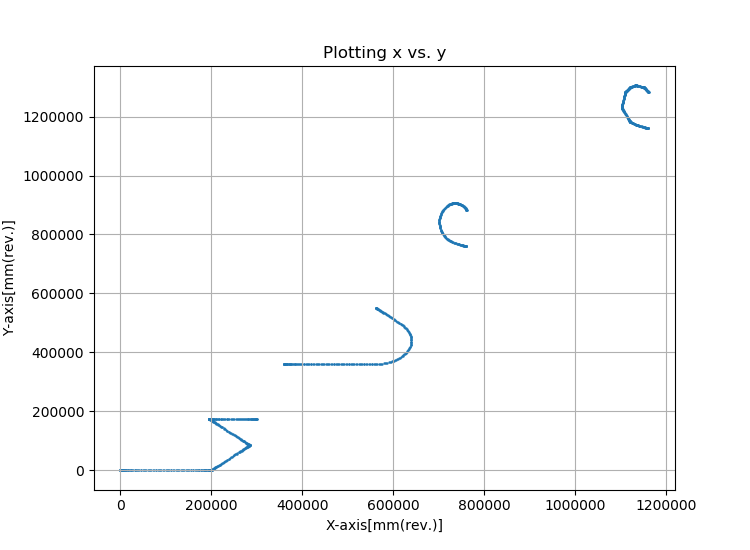

Text(0, 0.5, 'Y-axis[mm(rev.)]')

In [51]:
plt.figure(figsize=(7.5, 5.5))
plt.scatter(x, y, s=0.5)
plt.grid()
plt.title("Plotting x vs. y")
plt.xlabel("X-axis[mm(rev.)]")
plt.ylabel("Y-axis[mm(rev.)]")

### *Исцртување на брзината на x оска.*
*Сите точки од rapid move движењето беа игнорирани.

### Ctrl + Enter

<IPython.core.display.Javascript object>


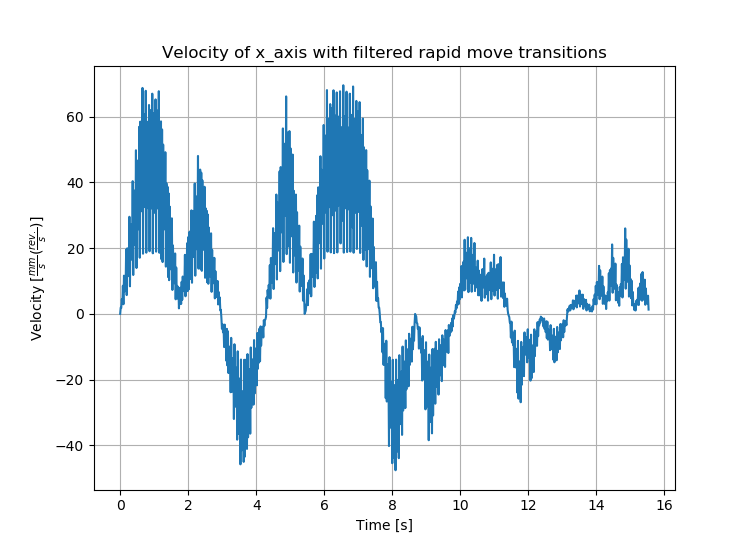

In [52]:
plt.figure(figsize=(7.5, 5.5))
dt = int(file_name[6:9])/8000 # Delta_t between two points((128 samples)/(8000Hz))
dx = (x[1:] - x[:-1])/(dt*4000) # 4000 encoder counts
dx = dx[np.abs(dx) <2*np.std(dx)]
t = dt * np.arange(dx.shape[0]) # Time between rapid movements is ignored
plt.plot(t, dx)
plt.title("Velocity of x_axis with filtered rapid move transitions")
plt.xlabel("Time [s]")
plt.ylabel(r"Velocity [$\frac{mm}{s}(\frac{rev.}{s})$]")
plt.grid()

### *Исцртување на забрзувањето на x оска.*
*Сите точки од rapid move движењето беа игнорирани.

### Ctrl + Enter

<IPython.core.display.Javascript object>


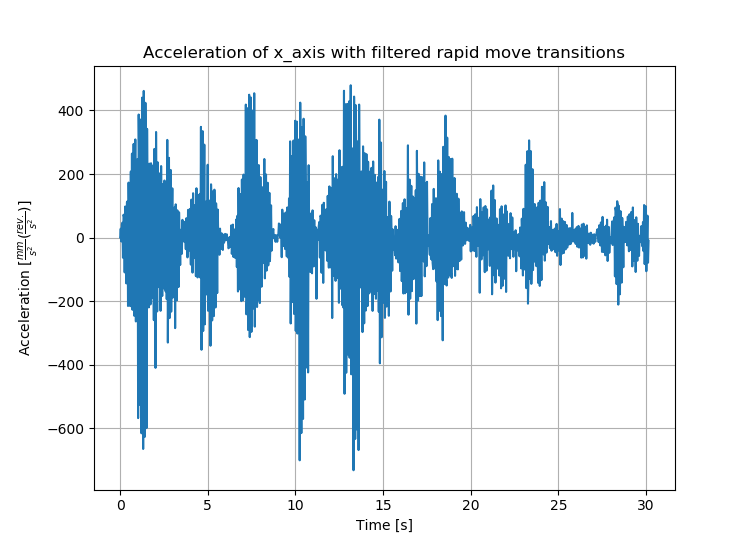

In [45]:
plt.figure(figsize=(7.5, 5.5))
ddx = (dx[1:] - dx[:-1])/dt
# dx = dx[np.abs(dx) <2*np.std(dx)]
plt.plot(t[:-1], ddx)
plt.title("Acceleration of x_axis with filtered rapid move transitions")
plt.xlabel("Time [s]")
plt.ylabel(r"Acceleration [$\frac{mm}{s^2}(\frac{rev.}{s^2})$]")
plt.grid()

### *Исцртување на брзината на y оска.*
*Сите точки од rapid move движењето беа игнорирани.

### Ctrl + Enter

<IPython.core.display.Javascript object>


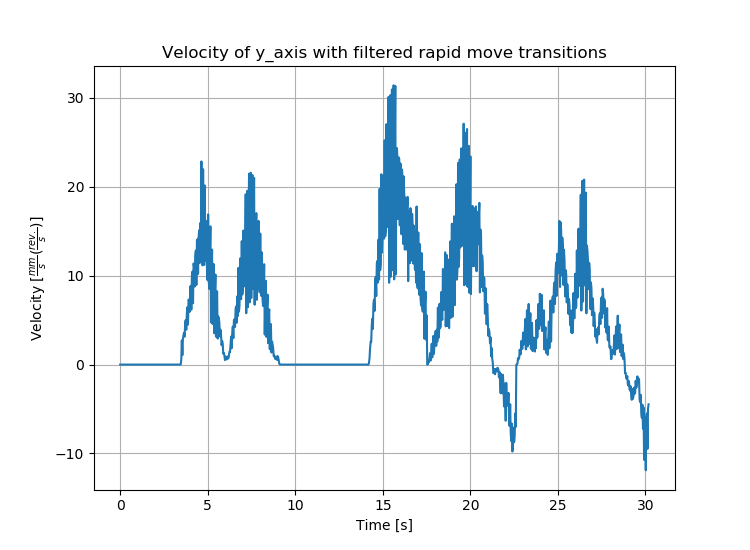

In [46]:
plt.figure(figsize=(7.5, 5.5))
dy = (y[1:] - y[:-1])/(dt*4000) # 4000 encoder counts
dy = dy[np.abs(dy) <2*np.std(dy)]
plt.plot(t, dy)
plt.title("Velocity of y_axis with filtered rapid move transitions")
plt.xlabel("Time [s]")
plt.ylabel(r"Velocity [$\frac{mm}{s}(\frac{rev.}{s})$]")
plt.grid()

### *Исцртување на забрзувањето на y оска.*
*Сите точки од rapid move движењето беа игнорирани.

### Ctrl + Enter

<IPython.core.display.Javascript object>


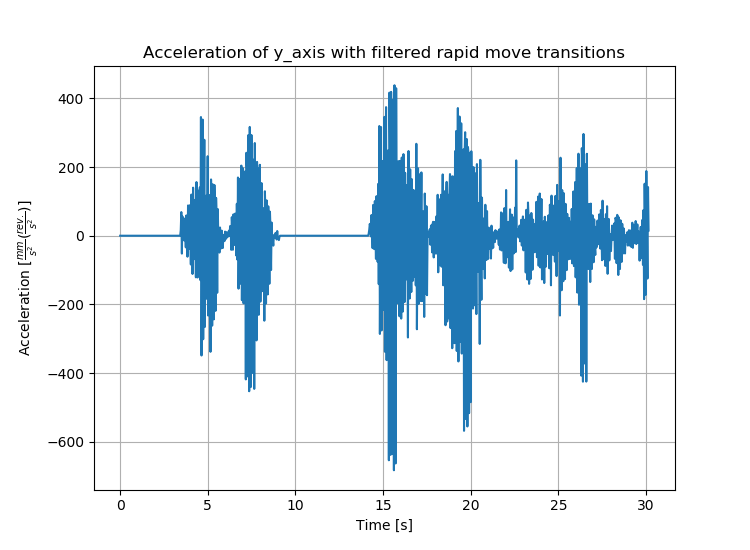

In [47]:
plt.figure(figsize=(7.5, 5.5))
ddy = (dy[1:] - dy[:-1])/dt
# dx = dx[np.abs(dx) <2*np.std(dx)]
plt.plot(t[:-1], ddy)
plt.title("Acceleration of y_axis with filtered rapid move transitions")
plt.xlabel("Time [s]")
plt.ylabel(r"Acceleration [$\frac{mm}{s^2}(\frac{rev.}{s^2})$]")
plt.grid()